# Tugas 2

Load dan Persiapan Data

## Data Understanding

## **mengambil data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [ ]:
import pandas as pd

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Membersihkan nilai dalam setiap sel (hanya untuk tipe string)
# data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menampilkan beberapa baris pertama dari dataframe yang sudah bersih
# print("\nDataframe Bersih:")
print(data.head())

      Tanggal  harga
0  03/10/2022  22650
1  10/10/2022  22650
2  17/10/2022  22650
3  24/10/2022  22650
4  31/10/2022  14350


## **Plotting Data**

Dataframe Bersih:
     Tanggal  harga
0 2022-10-03  22650
1 2022-10-10  22650
2 2022-10-17  22650
3 2022-10-24  22650
4 2022-10-31  14350


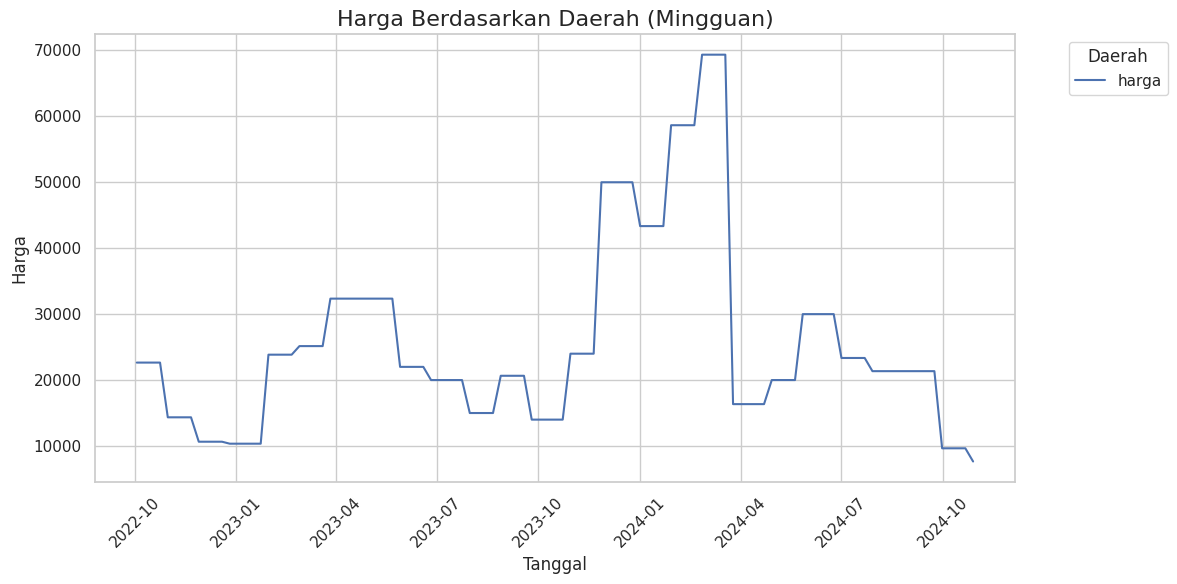

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Menampilkan beberapa baris pertama dari dataframe yang sudah bersih
print("Dataframe Bersih:")
print(data.head())

# Mengatur gaya plotting
sns.set(style="whitegrid")

# Memplot data
plt.figure(figsize=(12, 6))

# Mengasumsikan kolom pertama adalah tanggal dan kolom sisanya berisi harga dari berbagai daerah
for column in data.columns[1:]:
    plt.plot(data['Tanggal'], data[column], label=column)

# Menambahkan detail pada plot
plt.title('Harga Berdasarkan Daerah (Mingguan)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend(title="Daerah", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.describe()

,Tanggal,harga
count,109,109.000000
mean,2023-10-16 00:00:00,25734.403670
min,2022-10-03 00:00:00,7650.000000
25%,2023-04-10 00:00:00,16350.000000
50%,2023-10-16 00:00:00,22000.000000
75%,2024-04-22 00:00:00,30000.000000
max,2024-10-28 00:00:00,69350.000000
std,NaN,14559.378257


## **Sliding Window**

**sliding window sebelum normalisasi**

In [ ]:
import numpy as np
import pandas as pd

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';', header=0)

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Mengambil kolom "Harga" untuk proses sliding window
harga_data = data['harga'].values

# Fungsi untuk membuat sliding window
def create_sliding_window(data, leg):
    X, y = [], []
    for i in range(len(data) - leg):
        X.append(data[i:i + leg])
        y.append(data[i + leg])
    return np.array(X), np.array(y)

# Membuat fungsi yang fleksibel untuk mengatur sliding window berdasarkan input leg (window size)
def sliding_window_by_leg(data, leg):
    # Membuat sliding window dengan ukuran sesuai leg (window size)
    X, y = create_sliding_window(data, leg)

    # Menggabungkan data sliding window dengan target untuk ditampilkan
    sliding_window_df = pd.DataFrame(X, columns=[f'Minggu ke-{i+1}' for i in range(leg)])
    sliding_window_df['Target (Minggu ke+1)'] = y

    return sliding_window_df

# Contoh penggunaan fungsi untuk leg 4
leg = 4
result = sliding_window_by_leg(harga_data, leg)

# Menampilkan hasil
print(f"Sliding Window dengan Leg {leg}:")
print(result.head())


Sliding Window dengan Leg 4:
   Minggu ke-1  Minggu ke-2  Minggu ke-3  Minggu ke-4  Target (Minggu ke+1)
0        22650        22650        22650        22650                 14350
1        22650        22650        22650        14350                 14350
2        22650        22650        14350        14350                 14350
3        22650        14350        14350        14350                 14350
4        14350        14350        14350        14350                 10650


# Eksplorasi Data Analisis(EDA)

## **Normalisasi**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'

# Membaca file dengan delimiter ';' dan menentukan header ada di baris pertama
data = pd.read_csv(file_path, delimiter=';', header=0)

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()  # Membersihkan spasi ekstra pada nama kolom

# Pastikan kolom tanggal diformat dengan benar
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')  # Mengubah ke datetime
data = data.dropna(subset=['Tanggal'])  # Menghapus baris dengan tanggal yang tidak valid

# Memilih kolom harga untuk normalisasi
harga_column = 'harga'  # Ganti sesuai nama kolom harga Anda
if harga_column not in data.columns:
    raise ValueError(f"Kolom '{harga_column}' tidak ditemukan dalam data.")

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Normalisasi kolom harga
data['harga_Normalized'] = scaler.fit_transform(data[[harga_column]])

# Menampilkan hasil normalisasi
print("Data Setelah Normalisasi:")
print(data[['Tanggal', 'harga', 'harga_Normalized']].head())

Data Setelah Normalisasi:
      Tanggal  harga  harga_Normalized
0  2022-03-10  22650         -0.297245
1  2022-10-10  22650         -0.297245
5  2022-07-11  14350         -0.839750
9  2022-05-12  10650         -1.081589
10 2022-12-12  10650         -1.081589


In [ ]:
# Salin data ter-normalisasi untuk keperluan sliding window
data_slide = data[['Tanggal', 'harga_Normalized']].copy()

# Menampilkan beberapa data untuk memastikan hasil salinan
print("Data Setelah Normalisasi dan Siap untuk Sliding Window:")
print(data_slide.head())

Data Setelah Normalisasi dan Siap untuk Sliding Window:
      Tanggal  harga_Normalized
0  2022-03-10         -0.297245
1  2022-10-10         -0.297245
5  2022-07-11         -0.839750
9  2022-05-12         -1.081589
10 2022-12-12         -1.081589


**Sliding Window setelah normalisasi**

In [ ]:
# Fungsi untuk membuat sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Memuat data
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = pd.read_csv(file_path, delimiter=';', header=0)

# Bersihkan nama kolom
data.columns = data.columns.str.strip().str.lower()  # Ubah ke huruf kecil dan hilangkan spasi tambahan

# Pastikan kolom harga ada
if 'harga' not in data.columns:
    raise ValueError("Kolom 'harga' tidak ditemukan dalam dataset. Periksa nama kolom atau format file CSV Anda.")

# Normalisasi data harga dengan MinMaxScaler
scaler = MinMaxScaler()
data['harga_normalized'] = scaler.fit_transform(data[['harga']])

# Membuat DataFrame yang berisi tanggal dan harga yang sudah dinormalisasi
df_slide_normalized = data[['tanggal', 'harga_normalized']].copy()
df_slide_normalized['tanggal'] = pd.to_datetime(df_slide_normalized['tanggal'], format='%d/%m/%Y', dayfirst=True)
df_slide_normalized.set_index('tanggal', inplace=True)

# Tentukan ukuran window
window_size = 4

# Membuat sliding window dari data yang sudah dinormalisasi
X_normalized, y_normalized = create_sliding_window(df_slide_normalized['harga_normalized'].values, window_size)

# Menggabungkan hasil sliding window yang sudah dinormalisasi
sliding_window_normalized_df = pd.DataFrame(X_normalized, columns=[f'Week-{i+1}' for i in range(window_size)])
sliding_window_normalized_df['Target (Week+1)'] = y_normalized

# Menampilkan hasil sliding window normalisasi (5 contoh pertama)
print(sliding_window_normalized_df.head())

     Week-1    Week-2    Week-3    Week-4  Target (Week+1)
0  0.243112  0.243112  0.243112  0.243112         0.108590
1  0.243112  0.243112  0.243112  0.108590         0.108590
2  0.243112  0.243112  0.108590  0.108590         0.108590
3  0.243112  0.108590  0.108590  0.108590         0.108590
4  0.108590  0.108590  0.108590  0.108590         0.048622


In [ ]:
data_slide.dtypes

,0
Tanggal,datetime64[ns]
harga_Normalized,float64


## **Cek Data Outlier**

In [ ]:
import pandas as pd
from scipy.stats import zscore  # Import zscore untuk menghitung Z-score

# Bersihkan nama kolom
data.columns = data.columns.str.strip().str.lower()

# Pastikan hanya kolom numerik yang dihitung z-score
numerical_cols = data.select_dtypes(include=[float, int]).columns
if numerical_cols.empty:
    raise ValueError("Tidak ada kolom numerik untuk menghitung Z-score.")

# Menghitung Z-score untuk setiap kolom numerik
z_scores = data[numerical_cols].apply(zscore)

# Menentukan threshold untuk mendeteksi outlier (biasanya 3 atau -3)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Menampilkan data yang mengandung outlier
data_outliers = data[outliers.any(axis=1)]
print("Data dengan Outlier:")
print(data_outliers)

# Menampilkan jumlah outlier pada setiap kolom
outlier_counts = outliers.sum()
print("\nJumlah Outlier per Kolom:")
print(outlier_counts)

Data dengan Outlier:
       tanggal  harga  harga_normalized
73  26/02/2024  69350               1.0
74  04/03/2024  69350               1.0
75  11/03/2024  69350               1.0
76  18/03/2024  69350               1.0

Jumlah Outlier per Kolom:
harga               4
harga_normalized    4
dtype: int64


## **Cek Missing Values**

In [ ]:
# Cek missing values sebelum pembersihan
print("Jumlah missing values sebelum pembersihan:")
print(sliding_window_normalized_df.isna().sum())

# Menghapus missing values
sliding_window_normalized_df.dropna(inplace=True)

# Cek missing values setelah pembersihan
print("\nJumlah missing values setelah pembersihan:")
print(sliding_window_normalized_df.isna().sum())


Jumlah missing values sebelum pembersihan:
Week-1             0
Week-2             0
Week-3             0
Week-4             0
Target (Week+1)    0
dtype: int64

Jumlah missing values setelah pembersihan:
Week-1             0
Week-2             0
Week-3             0
Week-4             0
Target (Week+1)    0
dtype: int64


# **Prepocessing data**

## **Normalisasi Data**

Informasi Data Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  109 non-null    object
 1   harga    109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None

Data Setelah Normalisasi:
      Tanggal     harga
0  03/10/2022  0.243112
1  10/10/2022  0.243112
2  17/10/2022  0.243112
3  24/10/2022  0.243112
4  31/10/2022  0.108590


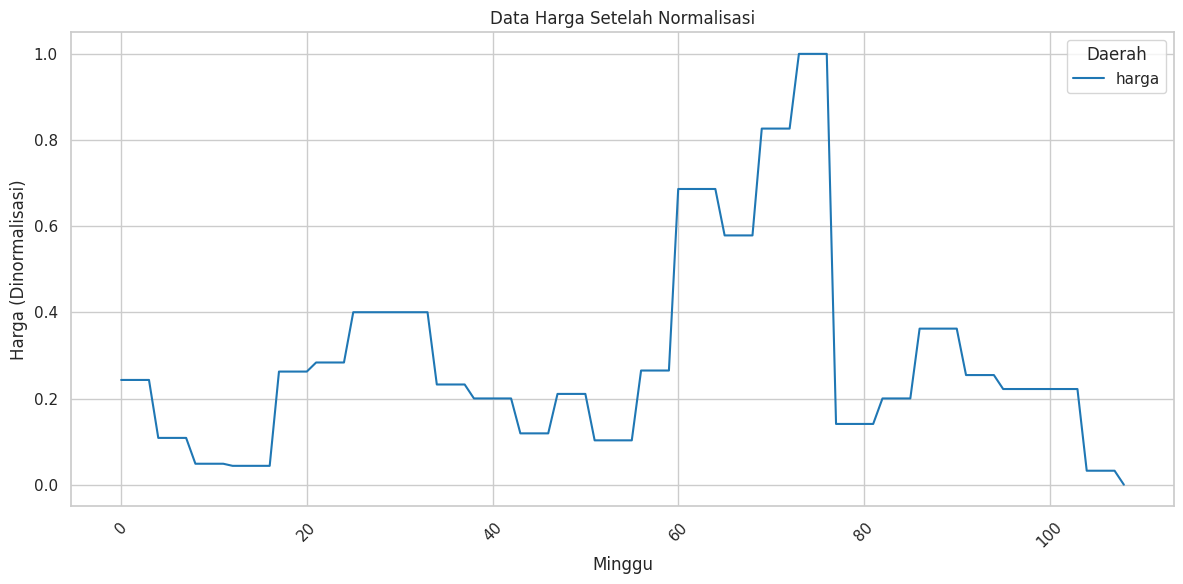

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong dan membersihkan nama kolom
data = data.dropna(axis=1, how='all')
data.columns = data.columns.str.strip()

# Menampilkan informasi awal tentang data
print("Informasi Data Awal:")
print(data.info())

# Mengatur scaler untuk normalisasi
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom harga (menganggap harga mulai dari kolom ke-2 dan seterusnya)
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Menampilkan data yang sudah dinormalisasi
print("\nData Setelah Normalisasi:")
print(data_normalized.head())

# Mengatur gaya plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_normalized.drop(columns='Tanggal'), palette='tab10')
plt.title('Data Harga Setelah Normalisasi')
plt.xlabel('Minggu')
plt.ylabel('Harga (Dinormalisasi)')
plt.xticks(rotation=45)
plt.legend(data_normalized.columns[1:], title='Daerah')
plt.tight_layout()
plt.show()


## **Visualisasi Data**

In [ ]:
print(data_slide.isnull().sum())

Tanggal             0
harga_Normalized    0
dtype: int64


# **Training Data**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Asumsikan sliding_window_normalized_df sudah tersedia
# Periksa apakah ada NaN pada data
print("Jumlah nilai NaN sebelum pembersihan:")
print(sliding_window_normalized_df.isna().sum())

# Hapus baris dengan NaN
sliding_window_normalized_df.dropna(inplace=True)

# Konfirmasi tidak ada NaN setelah pembersihan
if sliding_window_normalized_df.isna().any().any():
    raise ValueError("Data masih mengandung NaN setelah pembersihan.")

# Memisahkan fitur (X) dan target (y)
X = sliding_window_normalized_df.iloc[:, :-1].values  # Semua kolom kecuali target
y = sliding_window_normalized_df.iloc[:, -1].values   # Kolom target

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Bagging dengan estimator Decision Tree
model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Jumlah nilai NaN sebelum pembersihan:
Week-1             0
Week-2             0
Week-3             0
Week-4             0
Target (Week+1)    0
dtype: int64
Mean Squared Error: 0.008522949450174126


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.09231982154539796


# **Modelling**

## **random forest**

In [ ]:
def clean_data(df):
    # Hapus kolom Unnamed
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Hapus kolom yang seluruhnya kosong
    df.dropna(axis=1, how='all', inplace=True)

    # Hapus baris dengan nilai kosong
    df.dropna(axis=0, how='any', inplace=True)

    # Identifikasi dan hapus kolom dengan nilai konstan
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    df.drop(columns=constant_columns, inplace=True)

    return df

# Terapkan fungsi pada dataset
data_cleaned = clean_data(data)

print("\nDataset setelah pembersihan:")
print(data_cleaned.head())



Dataset setelah pembersihan:
      Tanggal  harga
0  03/10/2022  22650
1  10/10/2022  22650
2  17/10/2022  22650
3  24/10/2022  22650
4  31/10/2022  14350


In [ ]:
# Menghapus kolom dengan semua nilai NaN
data.dropna(axis=1, how='all', inplace=True)

# Menghapus baris dengan nilai NaN
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = pd.read_csv(file_path, delimiter=';')


Kolom yang tersedia dalam dataset: Index(['Tanggal', 'harga'], dtype='object')
MSE: 0.0849, RMSE: 0.2915


<ipython-input-19-91a53dad1a90>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['harga'] = (data_cleaned['harga'] - data_cleaned['harga'].min()) / (


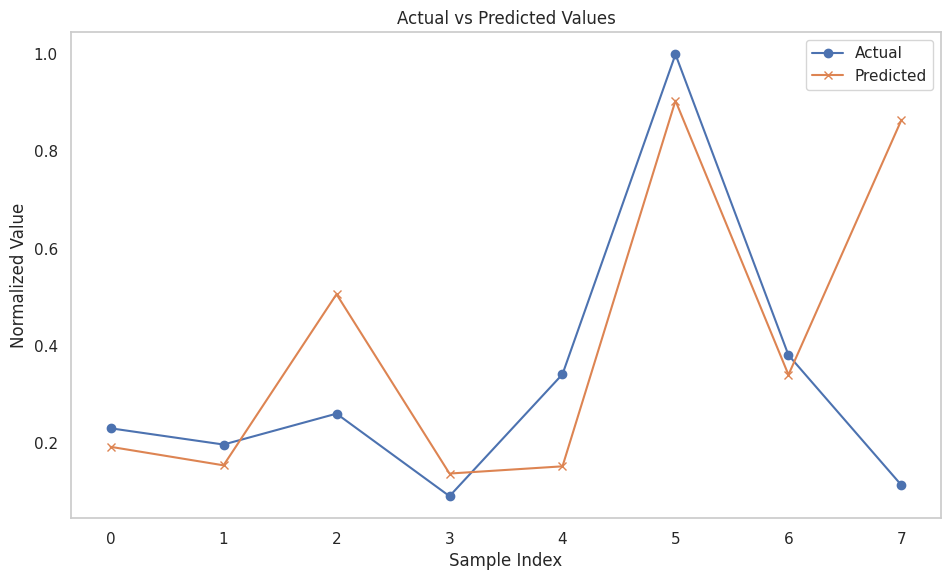

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Path file di Colab
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'

# Membaca data dengan delimiter yang benar
data = data_normalized

# Periksa kolom yang ada
print("Kolom yang tersedia dalam dataset:", data.columns)

# Pastikan kolom 'tanggal' dan 'harga' ada
if 'Tanggal' not in data.columns or 'harga' not in data.columns:
    raise KeyError("Pastikan kolom 'tanggal' dan 'harga' ada dalam file CSV Anda.")

# Ubah tipe data
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data['harga'] = pd.to_numeric(data['harga'], errors='coerce')
data_cleaned = data.dropna(subset=['Tanggal', 'harga'])

# Normalisasi harga
data_cleaned['harga'] = (data_cleaned['harga'] - data_cleaned['harga'].min()) / (
    data_cleaned['harga'].max() - data_cleaned['harga'].min()
)

# Sliding window
window_size = 4
features = []
targets = []

for i in range(len(data_cleaned) - window_size):
    features.append(data_cleaned['harga'].iloc[i:i + window_size].values)
    targets.append(data_cleaned['harga'].iloc[i + window_size])

features = np.array(features)
targets = np.array(targets)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()


### **menggunakan MAPE**

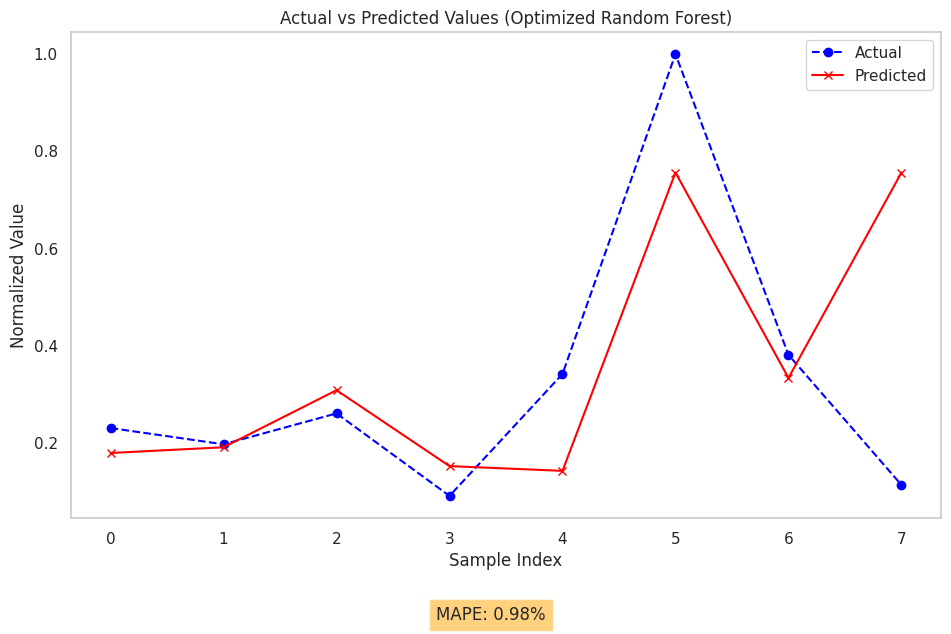

MAPE setelah optimasi: 0.98%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Optimasi Model Random Forest
model_optimized = RandomForestRegressor(
    n_estimators=10,        # Menambah jumlah pohon
    max_depth=10,            # Membatasi kedalaman pohon
    min_samples_split=5,     # Minimal sampel untuk split
    min_samples_leaf=2,      # Minimal sampel pada daun
    random_state=42
)

# Latih model ulang
model_optimized.fit(X_train, y_train)

# Prediksi ulang
y_pred_optimized = model_optimized.predict(X_test)

# Hitung MAPE
mape_optimized = mean_absolute_percentage_error(y_test, y_pred_optimized)

# Visualisasi dengan MAPE yang dioptimasi
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='--', color='blue')
plt.plot(y_pred_optimized, label='Predicted', marker='x', linestyle='-', color='red')
plt.title('Actual vs Predicted Values (Optimized Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()

# Tambahkan nilai MAPE di bawah grafik
plt.figtext(0.5, -0.1, f"MAPE: {mape_optimized:.2f}%", ha="center", fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

plt.show()

print(f"MAPE setelah optimasi: {mape_optimized:.2f}%")


### **prediksi harga minggu depan**

Jumlah NaN di kolom 'harga' setelah penggantian: 0
Ukuran data X: (105, 4)
Ukuran data y: (105,)


<ipython-input-21-74bb7159b76c>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['harga'].fillna(data['harga'].mean(), inplace=True)


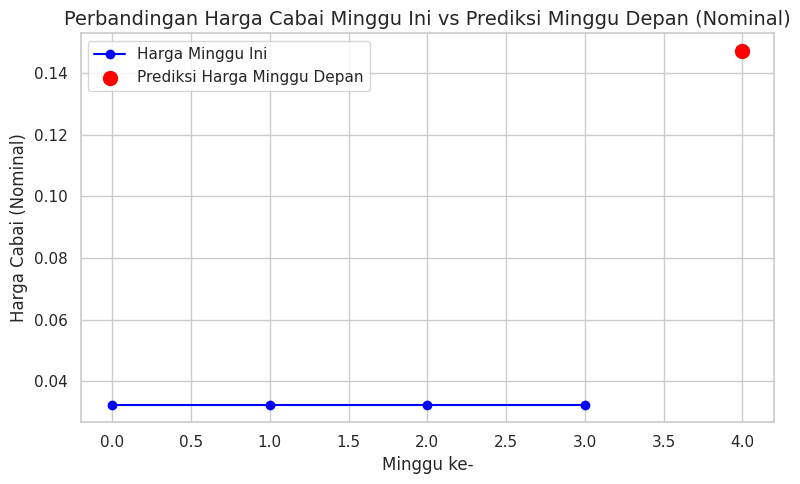

Harga cabai minggu ini (minggu terakhir, nominal): [0.03241491 0.03241491 0.03241491 0.03241491]
Prediksi harga cabai minggu depan (nominal): 0.14714343598055107


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = data_normalized

# Menampilkan kolom-kolom yang ada
# print("Nama kolom dataset:")
# print(data.columns)

# Pastikan kolom Tanggal dan harga ada
if 'Tanggal' not in data.columns or 'harga' not in data.columns:
    raise KeyError("Pastikan kolom 'Tanggal' dan 'Harga' ada dalam dataset.")

# Mengubah kolom Tanggal menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Menampilkan baris yang mengandung NaN di kolom harga
# print("Baris dengan NaN di kolom 'harga':")
# print(data[data['harga'].isnull()])  # Menampilkan baris yang mengandung NaN

# Mengganti NaN di kolom harga dengan nilai rata-rata
data['harga'].fillna(data['harga'].mean(), inplace=True)

# Pastikan tidak ada NaN di kolom harga setelah penggantian
print(f"Jumlah NaN di kolom 'harga' setelah penggantian: {data['harga'].isnull().sum()}")

# Normalisasi data harga menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Pastikan kolom harga tidak kosong
if data['harga'].shape[0] == 0:
    raise ValueError("Kolom harga kosong. Tidak ada data yang dapat diproses.")

data_normalized = data.copy()
data_normalized['Harga_Normalized'] = scaler.fit_transform(data[['harga']])

# Pembuatan Sliding Window untuk prediksi
window_size = 4  # Menggunakan 4 minggu terakhir untuk prediksi
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])  # Target adalah harga minggu berikutnya
    return np.array(X), np.array(y)

# Data Sliding Window
X, y = create_sliding_window(data_normalized['Harga_Normalized'].values, window_size)

# Periksa apakah ada NaN dalam X atau y
if np.isnan(X).any() or np.isnan(y).any():
    raise ValueError("Data sliding window mengandung nilai NaN. Pastikan data bersih sebelum digunakan.")

# Periksa ukuran data setelah sliding window
print(f"Ukuran data X: {X.shape}")
print(f"Ukuran data y: {y.shape}")

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Ambil harga minggu ini (window terakhir dalam data testing)
current_week_prices = X_test[-1]  # Harga pada minggu terakhir data test

# Prediksi harga minggu depan
predicted_price_next_week = rf_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# Denormalisasi harga prediksi
predicted_price_next_week_nominal = scaler.inverse_transform([[predicted_price_next_week]])[0][0]

# Visualisasi Perbandingan Harga
plt.figure(figsize=(8, 5))

# Plot harga minggu ini
plt.plot(np.arange(window_size), scaler.inverse_transform([current_week_prices])[0], label='Harga Minggu Ini', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan
plt.scatter(window_size, predicted_price_next_week_nominal, label='Prediksi Harga Minggu Depan', color='red', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output harga nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {scaler.inverse_transform([current_week_prices])[0]}')
print(f'Prediksi harga cabai minggu depan (nominal): {predicted_price_next_week_nominal}')


## **Gradient Boosting Regressor**

Kolom yang tersedia dalam dataset: Index(['Tanggal', 'harga', 'Harga_Normalized'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 105
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tanggal           43 non-null     datetime64[ns]
 1   harga             43 non-null     float64       
 2   Harga_Normalized  43 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB
None
      Tanggal     harga  Harga_Normalized
0  2022-03-10  0.243112          0.243112
1  2022-10-10  0.243112          0.243112
5  2022-07-11  0.108590          0.108590
9  2022-05-12  0.048622          0.048622
10 2022-12-12  0.048622          0.048622
MSE: 0.0645, RMSE: 0.2539


<ipython-input-22-757776c71be8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['harga'] = (data_cleaned['harga'] - data_cleaned['harga'].min()) / (


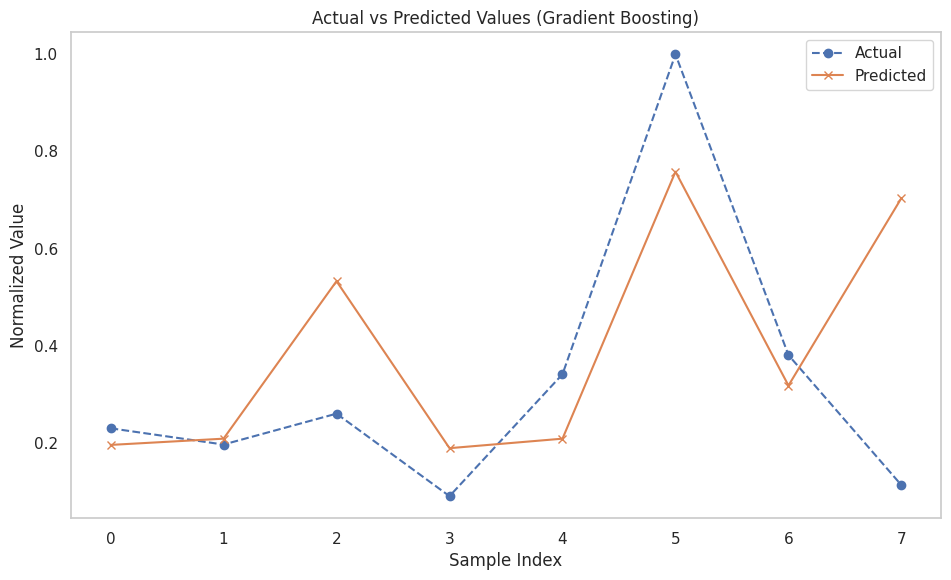

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Membaca data dengan delimiter yang benar
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = data_normalized

# Periksa kolom yang ada
print("Kolom yang tersedia dalam dataset:", data.columns)

# Pastikan kolom 'tanggal' dan 'harga' ada
if 'Tanggal' not in data.columns or 'harga' not in data.columns:
    raise KeyError("Pastikan kolom 'Tanggal' dan 'harga' ada dalam file CSV Anda.")

# 2. Ubah tipe data
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data['harga'] = pd.to_numeric(data['harga'], errors='coerce')

# Hapus baris dengan nilai NaN
data_cleaned = data.dropna(subset=['Tanggal', 'harga'])

# Periksa data setelah pembersihan
print(data_cleaned.info())
print(data_cleaned.head())

# 3. Normalisasi kolom harga
data_cleaned['harga'] = (data_cleaned['harga'] - data_cleaned['harga'].min()) / (
    data_cleaned['harga'].max() - data_cleaned['harga'].min()
)

# 4. Sliding window dengan ukuran 4
window_size = 4
features = []
targets = []

for i in range(len(data_cleaned) - window_size):
    features.append(data_cleaned['harga'].iloc[i:i + window_size].values)
    targets.append(data_cleaned['harga'].iloc[i + window_size])

features = np.array(features)
targets = np.array(targets)

# 5. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# 6. Model Gradient Boosting
model = GradientBoostingRegressor(random_state=42, n_estimators=10, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# 7. Hitung MSE dan RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# 8. Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='--')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='-')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()


### **menggunakan MAPE**

MSE (Optimized): 0.0457
RMSE (Optimized): 0.2137
MAPE (Optimized): 0.58%


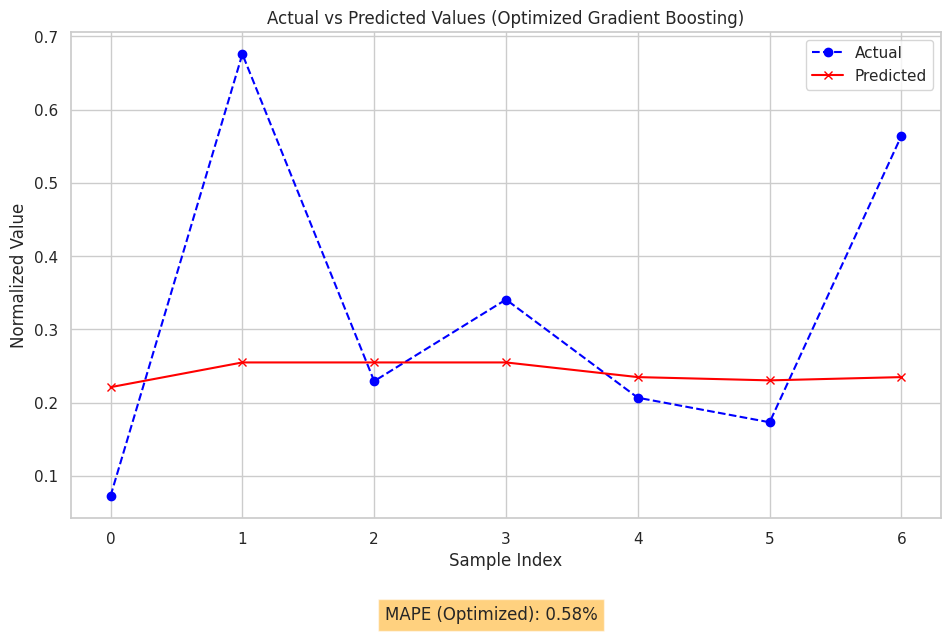

In [ ]:
# Menghapus outlier
q1 = data_cleaned["harga"].quantile(0.25)
q3 = data_cleaned["harga"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_cleaned = data_cleaned[(data_cleaned["harga"] >= lower_bound) & (data_cleaned["harga"] <= upper_bound)]

# Sliding window dengan ukuran lebih besar
window_size = 5  # Menggunakan window lebih besar untuk menangkap lebih banyak informasi
features = []
targets = []

for i in range(len(data_cleaned) - window_size):
    features.append(data_cleaned["harga"].iloc[i:i + window_size].values)
    targets.append(data_cleaned["harga"].iloc[i + window_size])

features = np.array(features)
targets = np.array(targets)

# StandardScaler untuk standarisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Model Gradient Boosting dengan optimasi
model_optimized = GradientBoostingRegressor(
    n_estimators=10,  # Lebih banyak pohon untuk meningkatkan akurasi
    learning_rate=0.01,  # Laju pembelajaran lebih kecil agar lebih stabil
    max_depth=8,         # Meningkatkan kedalaman pohon untuk menangkap lebih banyak pola
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
model_optimized.fit(X_train, y_train)

# Prediksi ulang
y_pred_optimized = model_optimized.predict(X_test)

# Hitung metrik evaluasi
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mape_optimized = mean_absolute_percentage_error(y_test, y_pred_optimized)

print(f"MSE (Optimized): {mse_optimized:.4f}")
print(f"RMSE (Optimized): {rmse_optimized:.4f}")
print(f"MAPE (Optimized): {mape_optimized:.2f}%")

# Visualisasi ulang hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='--', color='blue')
plt.plot(y_pred_optimized, label='Predicted', marker='x', linestyle='-', color='red')
plt.title('Actual vs Predicted Values (Optimized Gradient Boosting)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)

# Tambahkan nilai MAPE di bawah grafik
plt.figtext(0.5, -0.1, f"MAPE (Optimized): {mape_optimized:.2f}%", ha="center", fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

plt.show()


### **prediksi harga minggu depan**

In [ ]:
# Menghapus baris yang mengandung NaN
# data_cleaned = data.dropna(subset=['harga'])


In [ ]:
# Mengganti NaN dengan rata-rata kolom 'harga'
# data['harga'] = data['harga'].fillna(data['harga'].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Prediksi harga minggu depan (nominal): 0.25


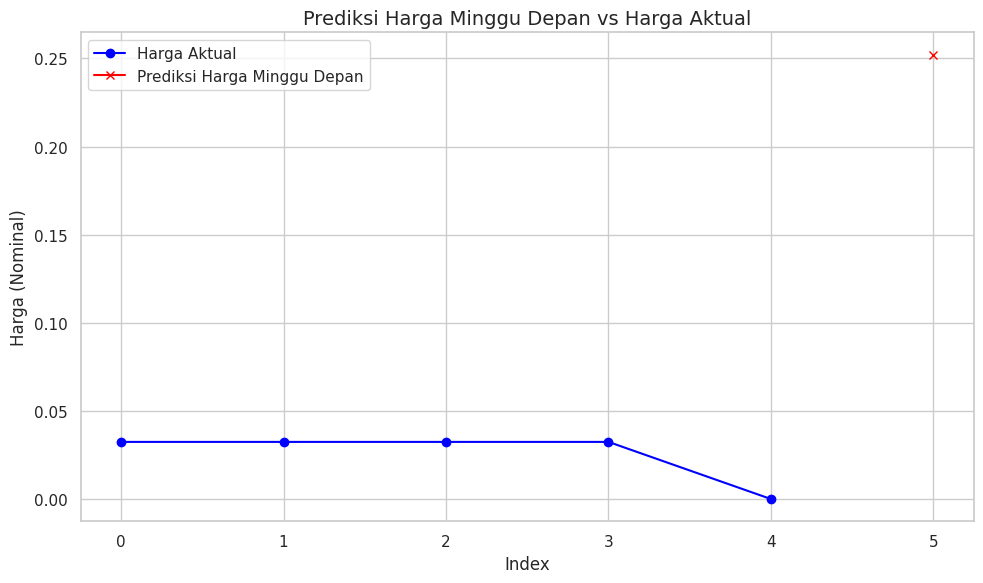

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = data_normalized

# Memastikan kolom 'Tanggal' dan 'harga' ada
if 'Tanggal' not in data.columns or 'harga' not in data.columns:
    raise KeyError("Pastikan kolom 'Tanggal' dan 'harga' ada dalam dataset.")

# Mengubah kolom 'Tanggal' menjadi datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Menangani nilai NaN pada kolom 'harga'
# 1. Menghapus baris yang mengandung NaN
data_cleaned = data.dropna(subset=['harga'])

# Atau, bisa juga mengganti NaN dengan rata-rata (gunakan salah satu metode ini)
# data_cleaned['harga'] = data_cleaned['harga'].fillna(data_cleaned['harga'].mean())

# Normalisasi data harga menggunakan MinMaxScaler
scaler = MinMaxScaler()
data_normalized = data_cleaned.copy()

# Menggunakan MinMaxScaler hanya untuk kolom 'harga'
data_normalized['Harga_Normalized'] = scaler.fit_transform(data_cleaned[['harga']])

# Pembuatan Sliding Window untuk prediksi
window_size = 5  # Menggunakan 5 harga terakhir untuk prediksi harga minggu depan
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])  # Target adalah harga minggu berikutnya
    return np.array(X), np.array(y)

# Data Sliding Window
X, y = create_sliding_window(data_normalized['Harga_Normalized'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Ambil 5 harga terakhir untuk prediksi harga minggu depan
last_5_prices = data_normalized["harga"].iloc[-5:].values

# Reshape last_5_prices untuk menyesuaikan format input yang diharapkan oleh MinMaxScaler
last_5_prices_scaled = scaler.transform(last_5_prices.reshape(-1, 1))

# Prediksi harga minggu depan menggunakan model Gradient Boosting
predicted_price_next_week_scaled = gb_model.predict(last_5_prices_scaled.reshape(1, -1))

# Mengembalikan prediksi ke skala nominal
predicted_price_next_week_nominal = scaler.inverse_transform([[predicted_price_next_week_scaled[0]]])

# Output hasil prediksi dalam skala nominal
print(f"Prediksi harga minggu depan (nominal): {predicted_price_next_week_nominal[0][0]:.2f}")

# Buat grafik untuk menampilkan harga yang diprediksi dan harga aktual sebelumnya
plt.figure(figsize=(10, 6))

# Plot harga yang sebenarnya (5 data terakhir termasuk harga sebelumnya)
plt.plot(range(len(data_normalized["harga"].iloc[-5:])), data_normalized["harga"].iloc[-5:], label='Harga Aktual', marker='o', linestyle='-', color='blue')

# Plot harga yang diprediksi (nilai prediksi minggu depan dalam skala nominal)
plt.plot(len(data_normalized["harga"].iloc[-5:]), predicted_price_next_week_nominal[0][0], label='Prediksi Harga Minggu Depan', marker='x', linestyle='-', color='red')

# Pengaturan judul dan label
plt.title('Prediksi Harga Minggu Depan vs Harga Aktual', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Harga (Nominal)', fontsize=12)

# Menambahkan legenda untuk membedakan garis
plt.legend()

# Menambahkan grid agar lebih mudah membaca grafik
plt.grid(True)

# Tampilkan grafik
plt.tight_layout()
plt.show()


## **Ensemble Bagging Regressor**

Kolom dalam dataset: Index(['Tanggal', 'harga'], dtype='object')
RMSE Bagging Regressor (Scaled): 0.1259


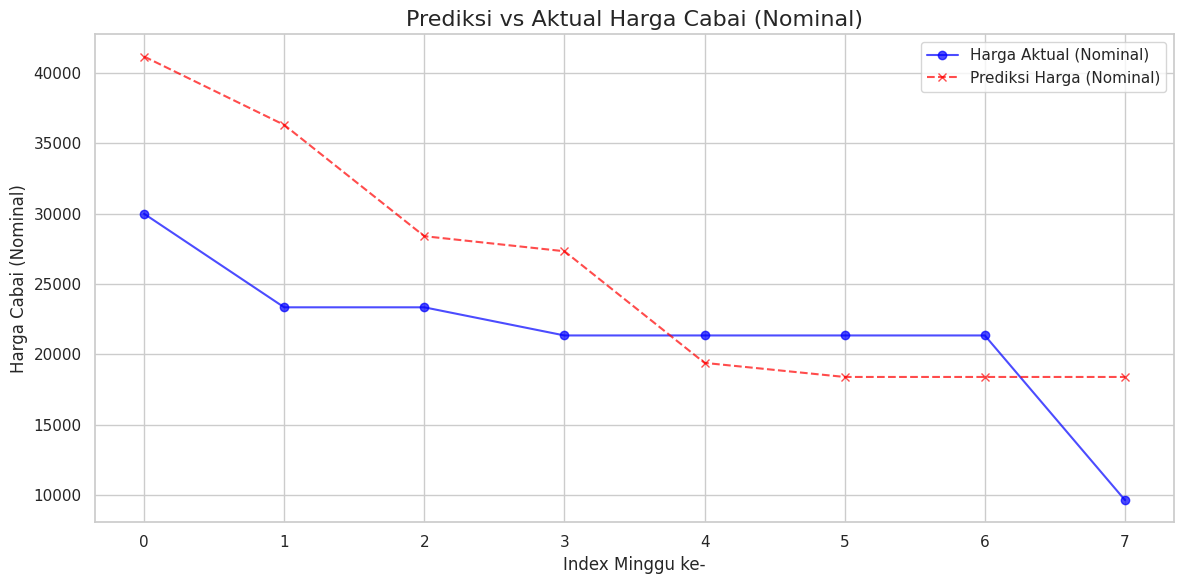

=== Hasil Prediksi Minggu Depan (Nominal) ===
Harga cabai minggu ini (nominal): [21350. 21350. 21350. 21350.]
Prediksi harga cabai minggu depan (nominal): 18400.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = pd.read_csv(file_path, delimiter=';')  # Pastikan delimiter sesuai dengan file Anda

# Debugging nama kolom
print("Kolom dalam dataset:", data.columns)

# Sesuaikan nama kolom jika berbeda
tanggal_col = 'Tanggal'  # Nama kolom tanggal
harga_col = 'harga'      # Nama kolom harga (ganti sesuai dengan file Anda)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data[tanggal_col] = pd.to_datetime(data[tanggal_col], errors='coerce')

# Hapus data yang tidak valid (NaN)
data = data.dropna(subset=[tanggal_col, harga_col])

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[harga_col] = scaler.fit_transform(data_normalized[[harga_col]])

# Mengambil kolom tanggal dan harga untuk prediksi
df_slide = data_normalized[[tanggal_col, harga_col]].rename(columns={harga_col: 'xt'})
df_slide.set_index(tanggal_col, inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Bagging Regressor ===
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# === Prediksi harga di data uji ===
y_pred_bagging = bagging_model.predict(X_test)

# === Menghitung RMSE ===
rmse_bagging_scaled = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print(f'RMSE Bagging Regressor (Scaled): {rmse_bagging_scaled:.4f}')

# === Denormalisasi hasil prediksi dan data aktual ===
y_test_nominal = scaler.inverse_transform([[val] for val in y_test]).flatten()
y_pred_bagging_nominal = scaler.inverse_transform([[val] for val in y_pred_bagging]).flatten()

# === Visualisasi hasil prediksi vs aktual (Nominal) ===
plt.figure(figsize=(12, 6))

# Plot harga aktual (nominal)
plt.plot(y_test_nominal, label='Harga Aktual (Nominal)', color='blue', marker='o', linestyle='-', alpha=0.7)

# Plot prediksi harga (nominal)
plt.plot(y_pred_bagging_nominal, label='Prediksi Harga (Nominal)', color='red', marker='x', linestyle='--', alpha=0.7)

# Menambahkan label dan judul
plt.title('Prediksi vs Aktual Harga Cabai (Nominal)', fontsize=16)
plt.xlabel('Index Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# === Output hasil prediksi minggu depan ===
# Data minggu terakhir
current_week_prices = X_test[-1]  # Harga minggu terakhir (skala normalisasi)
predicted_price_next_week_bagging = bagging_model.predict([current_week_prices])[0]  # Prediksi minggu depan (skala normalisasi)

# Denormalisasi
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]
predicted_price_next_week_nominal_bagging = scaler.inverse_transform([[predicted_price_next_week_bagging]])[0][0]

# Output hasil
print("=== Hasil Prediksi Minggu Depan (Nominal) ===")
print(f"Harga cabai minggu ini (nominal): {current_week_prices_nominal}")
print(f"Prediksi harga cabai minggu depan (nominal): {predicted_price_next_week_nominal_bagging:.2f}")


MAPE (Bagging Regressor): 19.18%


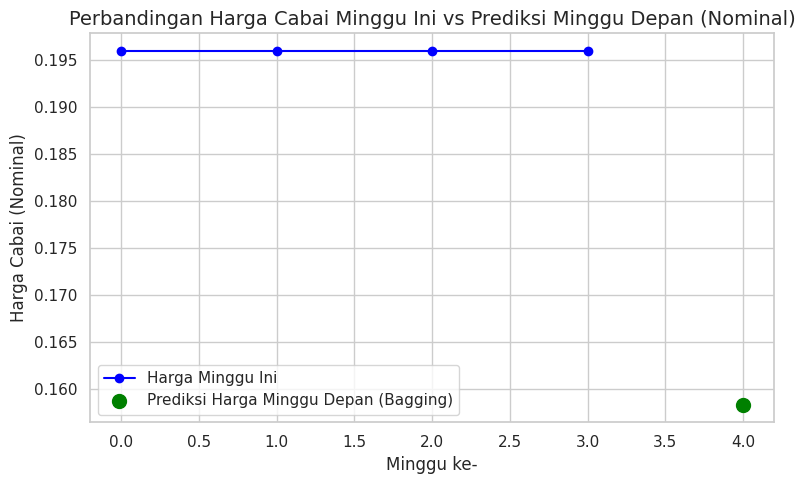

Harga cabai minggu ini (minggu terakhir, nominal): [0.1959799 0.1959799 0.1959799 0.1959799]
Prediksi harga cabai minggu depan (Bagging, nominal): 0.158391959798995


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
data = data_normalized

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Bagging Regressor ===
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=42)  # Mengganti base_estimator dengan estimator
bagging_model.fit(X_train, y_train)

# === Langkah 1: Ambil harga cabai minggu ini ===
# Harga cabai pada minggu terakhir data (harga aktual minggu ini)
current_week_prices = X_test[-1]  # Harga cabai minggu ini (window terakhir dalam data testing)

# === Langkah 2: Prediksi harga minggu depan menggunakan Bagging Regressor ===
predicted_price_next_week_bagging = bagging_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# === Denormalisasi harga untuk menampilkan dalam nominal asli ===
# Denormalisasi harga cabai minggu ini
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]

# Denormalisasi harga prediksi minggu depan (Bagging Regressor)
predicted_price_next_week_nominal_bagging = scaler.inverse_transform([[predicted_price_next_week_bagging]])[0][0]

# === Menghitung MAPE (Mean Absolute Percentage Error) ===
# Menggunakan harga minggu ini sebagai perbandingan dengan prediksi minggu depan
mape_bagging = mean_absolute_percentage_error([current_week_prices_nominal[-1]], [predicted_price_next_week_nominal_bagging])

print(f'MAPE (Bagging Regressor): {mape_bagging * 100:.2f}%')

# === Visualisasi perbandingan ===
plt.figure(figsize=(8, 5))

# Plot harga minggu ini (nominal)
plt.plot(np.arange(window_size), current_week_prices_nominal, label='Harga Minggu Ini', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan (nominal) - Bagging Regressor
plt.scatter(window_size, predicted_price_next_week_nominal_bagging, label='Prediksi Harga Minggu Depan (Bagging)', color='green', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output hasil nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {current_week_prices_nominal}')
print(f'Prediksi harga cabai minggu depan (Bagging, nominal): {predicted_price_next_week_nominal_bagging}')


### **parameter terbaik**

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# # Memuat data dari file CSV
# file_path = '/content/Tabel Harga Berdasarkan Daerah(1).csv'
# data = data_normalized

# # Memastikan kolom tanggal diubah menjadi tipe datetime
# data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# # Normalisasi data
# scaler = MinMaxScaler()
# data_normalized = data.copy()
# data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# # Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
# df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
# df_slide.set_index('Tanggal', inplace=True)

# # Membuat fungsi sliding window
# def create_sliding_window(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i:i+window_size])
#         y.append(data[i+window_size])
#     return np.array(X), np.array(y)

# # Membuat data sliding window (gunakan window size 4 minggu)
# window_size = 4
# X, y = create_sliding_window(df_slide['xt'].values, window_size)

# # Membagi data menjadi training dan testing (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # === Parameter Grid untuk Model ===
# # 1. Random Forest
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
# }

# # 2. Gradient Boosting
# gb_param_grid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [3, 5, 7],
# }

# # 3. Bagging Regressor
# bagging_param_grid = {
#     'n_estimators': [50, 100],
#     'estimator': [DecisionTreeRegressor(), RandomForestRegressor(n_estimators=50)],  # Mengganti base_estimator dengan estimator
# }

# # === Mencari Parameter Terbaik dengan GridSearchCV ===
# # 1. Random Forest
# rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring='neg_root_mean_squared_error', cv=5)
# rf_grid_search.fit(X_train, y_train)
# rf_best_params = rf_grid_search.best_params_

# # 2. Gradient Boosting
# gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, scoring='neg_root_mean_squared_error', cv=5)
# gb_grid_search.fit(X_train, y_train)
# gb_best_params = gb_grid_search.best_params_

# # 3. Bagging Regressor
# bagging_grid_search = GridSearchCV(BaggingRegressor(random_state=42), bagging_param_grid, scoring='neg_root_mean_squared_error', cv=5)
# bagging_grid_search.fit(X_train, y_train)
# bagging_best_params = bagging_grid_search.best_params_

# # === Tampilkan Hasil ===
# print("Best Parameters for Random Forest:", rf_best_params)
# print("Best Parameters for Gradient Boosting:", gb_best_params)
# print("Best Parameters for Bagging Regressor:", bagging_best_params)

# # Menghitung dan mencetak RMSE untuk masing-masing model dengan parameter terbaik
# rf_best_model = RandomForestRegressor(**rf_best_params, random_state=42)
# rf_best_model.fit(X_train, y_train)
# rf_predictions = rf_best_model.predict(X_test)
# rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# gb_best_model = GradientBoostingRegressor(**gb_best_params, random_state=42)
# gb_best_model.fit(X_train, y_train)
# gb_predictions = gb_best_model.predict(X_test)
# gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

# bagging_best_model = BaggingRegressor(**bagging_best_params, random_state=42)
# bagging_best_model.fit(X_train, y_train)
# bagging_predictions = bagging_best_model.predict(X_test)
# bagging_rmse = np.sqrt(mean_squared_error(y_test, bagging_predictions))

# print(f'Random Forest RMSE: {rf_rmse:.2f}')
# print(f'Gradient Boosting RMSE: {gb_rmse:.2f}')
# print(f'Bagging Regressor RMSE: {bagging_rmse:.2f}')


### **prediksi harga terbaik**

In [ ]:
# # Melakukan prediksi untuk minggu depan dengan model terbaik
# # Ambil data terakhir dari set pelatihan dan buat sliding window untuk prediksi
# last_data = df_slide['xt'].values[-window_size:]  # Ambil data terakhir sesuai dengan window size
# X_next_week = last_data.reshape(1, -1)  # Ubah bentuk menjadi 2D untuk model prediksi

# # Menggunakan model terbaik untuk memprediksi harga minggu depan
# rf_next_week_prediction = rf_best_model.predict(X_next_week)
# gb_next_week_prediction = gb_best_model.predict(X_next_week)
# bagging_next_week_prediction = bagging_best_model.predict(X_next_week)

# # Menampilkan hasil prediksi
# print(f"Prediksi Harga Cabai Minggu Depan:")
# print(f"Random Forest Prediction: {scaler.inverse_transform([[rf_next_week_prediction[0]]])[0][0]:.2f}")
# print(f"Gradient Boosting Prediction: {scaler.inverse_transform([[gb_next_week_prediction[0]]])[0][0]:.2f}")
# print(f"Bagging Regressor Prediction: {scaler.inverse_transform([[bagging_next_week_prediction[0]]])[0][0]:.2f}")


# Streamlit

In [6]:
!pip install streamlit
!pip install pyngrok
!apt-get install -y xdg-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xdg-utils is already the newest version (1.1.3-4.1ubuntu3~22.04.1).
xdg-utils set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [7]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Judul aplikasi
st.title("Prediksi Harga Cabai Merah Besar di Kab/Kota Mojokerto")

# Deskripsi aplikasi
st.write("""
Aplikasi ini menggunakan model **Gradient Boosting Regressor** untuk memprediksi harga cabai berdasarkan data historis.
""")

# Input Data
st.sidebar.header("Input Data Harga")
uploaded_file = st.sidebar.file_uploader("Unggah file CSV harga cabai", type=["csv"])

if uploaded_file is not None:
    # Membaca data dengan delimiter titik koma
    data = pd.read_csv(uploaded_file, delimiter=";")

    # Menampilkan beberapa baris pertama data untuk memastikan formatnya
    st.write("Data Harga Cabai:")
    st.dataframe(data.head(21))

    # Pastikan kolom Tanggal terpisah dengan benar
    if 'Tanggal' in data.columns:
        data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')
    else:
        st.error("Kolom 'Tanggal' tidak ditemukan dalam dataset.")

    # Pastikan kolom harga ada
    if 'harga' not in data.columns:
        st.error("Kolom 'harga' tidak ditemukan dalam dataset.")

    # Menampilkan informasi kolom
    st.write("Kolom yang ada dalam dataset:")
    st.write(data.columns)

    # Menghapus outlier
    q1 = data["harga"].quantile(0.25)
    q3 = data["harga"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_cleaned = data[(data["harga"] >= lower_bound) & (data["harga"] <= upper_bound)]

    # Sliding window dengan ukuran lebih besar
    window_size = 5  # Menggunakan window lebih besar untuk menangkap lebih banyak informasi
    features = []
    targets = []

    for i in range(len(data_cleaned) - window_size):
        features.append(data_cleaned["harga"].iloc[i:i + window_size].values)
        targets.append(data_cleaned["harga"].iloc[i + window_size])

    features = np.array(features)
    targets = np.array(targets)

    # StandardScaler untuk standarisasi
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

    # Model Gradient Boosting dengan optimasi
    model_optimized = GradientBoostingRegressor(
        n_estimators=100,  # Jumlah pohon untuk meningkatkan akurasi
        learning_rate=0.01,  # Laju pembelajaran lebih kecil agar lebih stabil
        max_depth=8,         # Meningkatkan kedalaman pohon untuk menangkap lebih banyak pola
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    )
    model_optimized.fit(X_train, y_train)

    # Prediksi ulang
    y_pred_optimized = model_optimized.predict(X_test)

    # Hitung metrik evaluasi
    mape_optimized = mean_absolute_percentage_error(y_test, y_pred_optimized)
    mse_optimized = np.mean((y_test - y_pred_optimized) ** 2)
    rmse_optimized = np.sqrt(mse_optimized)

    # Menampilkan hasil evaluasi
    st.write(f"MSE (Optimized): {mse_optimized:.4f}")
    st.write(f"RMSE (Optimized): {rmse_optimized:.4f}")
    st.write(f"MAPE (Optimized): {mape_optimized:.2f}%")

    # Menampilkan daftar harga prediksi
    result_df = pd.DataFrame({"Harga Aktual": y_test, "Harga Prediksi": y_pred_optimized})
    st.write("Daftar Harga Prediksi:")
    st.dataframe(result_df)

    # Visualisasi perbandingan harga aktual dan prediksi
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Harga Aktual', marker='o', linestyle='--', color='blue')
    plt.plot(y_pred_optimized, label='Harga Prediksi', marker='x', linestyle='-', color='red')
    plt.title('Perbandingan Harga Cabai Aktual vs Prediksi (Optimized Gradient Boosting)')
    plt.xlabel('Sample Index')
    plt.ylabel('Harga Cabai')
    plt.legend()
    plt.grid(True)

    # Menambahkan nilai MAPE di bawah grafik
    plt.figtext(0.5, -0.1, f"MAPE (Optimized): {mape_optimized:.2f}%", ha="center", fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

    st.pyplot(plt)

    # Prediksi harga minggu depan
    if st.button("Prediksi Minggu Depan"):
        last_window = data_cleaned["harga"].values[-window_size:]
        last_window_scaled = scaler.transform(last_window.reshape(1, -1))
        next_pred = model_optimized.predict(last_window_scaled)[0]
        st.write(f"Prediksi harga cabai minggu depan: {next_pred:.2f}")

Overwriting app.py


In [11]:
# Import library yang dibutuhkan
from pyngrok import ngrok
import os
# Instal pyngrok
!pip install pyngrok

# Impor modul yang diperlukan
from pyngrok import ngrok

# Membersihkan konfigurasi lama ngrok (jika ada)
!rm -rf ~/.ngrok2

# Masukkan auth token ngrok Anda di sini
ngrok.set_auth_token("2pz9qygKoJZ60A95H495InyWlbF_7GAzwQy8SEZaxdo8qeS9U")

# Jalankan aplikasi Streamlit (pastikan file app.py sudah ada)
!streamlit run /content/app.py &>/dev/null&

# Hubungkan ngrok ke port 8501 (port default Streamlit)
url = ngrok.connect(8501)
print(f"Aplikasi Streamlit Anda tersedia di: {url}")

Aplikasi Streamlit Anda tersedia di: NgrokTunnel: "https://37fe-35-203-174-97.ngrok-free.app" -> "http://localhost:8501"


link Streamlit saya: https://huggingface.co/spaces/lufthan/psd2